
# 📊 Notebook 4 – Logistic Regression Basics (Binary Classification)

In this notebook, you will:

- Create a simple **binary classification** dataset  
- Use the **sigmoid function**  
- Define the **logistic regression model**  
- Implement the **binary cross-entropy cost function**  
- Compute **gradients**  
- Train the model using **gradient descent**  
- Visualize predictions and the decision boundary  

Logistic regression is a fundamental algorithm for classification in machine learning.



## 1. Simple Binary Classification Dataset

We will create a small 1D dataset.

- Input `x` is a numeric feature  
- Output `y` is a class label: 0 or 1  


x: [1. 2. 3. 4. 5. 6. 7. 8. 9.]
y: [0. 0. 0. 0. 1. 1. 1. 1. 1.]


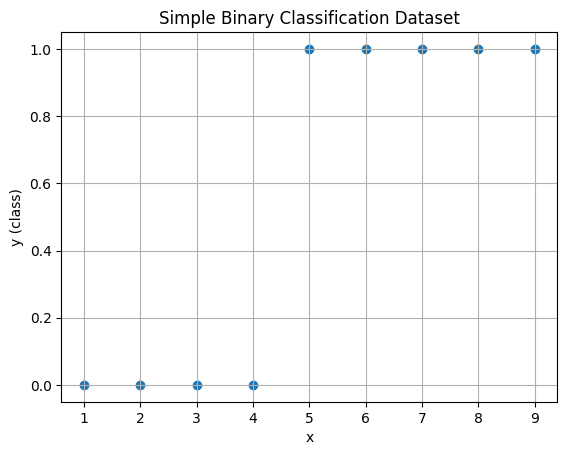

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Simple 1D dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=float)  # class labels: 0 or 1

print("x:", x)
print("y:", y)

plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y (class)")
plt.title("Simple Binary Classification Dataset")
plt.grid(True)
plt.show()



## 2. Sigmoid Function

The logistic regression model uses the **sigmoid** (logistic) function:

\[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

This function maps any real number to the range (0, 1), which can be interpreted as a probability.


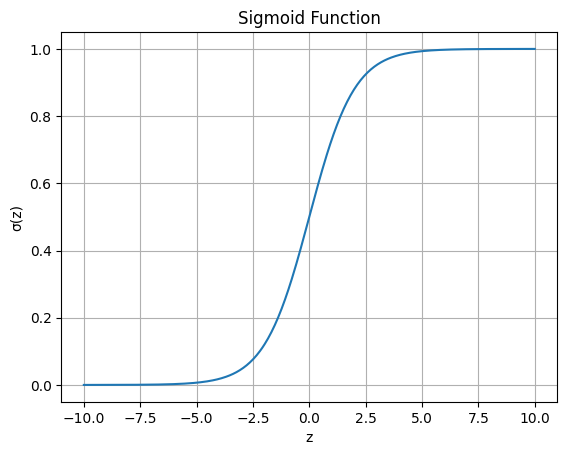

In [2]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 400)
s = sigmoid(z)

plt.figure()
plt.plot(z, s)
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()



## 3. Logistic Regression Model

For a single feature `x`, the logistic regression model is:

\[ \hat{y} = \sigma(wx + b) \]

Where:

- \( w \) is the weight  
- \( b \) is the bias  
- \( \hat{y} \) is the predicted probability that the class is 1  


In [3]:

def predict_prob(x, w, b):
    z = w * x + b
    return sigmoid(z)

# Example with w = 0, b = 0
w_test = 0.0
b_test = 0.0
y_hat_example = predict_prob(x, w_test, b_test)
print("Predicted probabilities with w=0, b=0:")
print(y_hat_example)


Predicted probabilities with w=0, b=0:
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]



## 4. Cost Function – Binary Cross-Entropy

The cost function for logistic regression is the **binary cross-entropy**:

\[ J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] \]

Where:

- \( m \) is the number of training examples  
- \( y^{(i)} \) is the true label (0 or 1)  
- \( \hat{y}^{(i)} \) is the predicted probability  


In [4]:

def compute_cost(x, y, w, b):
    m = len(x)
    y_hat = predict_prob(x, w, b)
    # Avoid log(0) by clipping
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    cost = -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

cost_initial = compute_cost(x, y, 0.0, 0.0)
print("Initial cost with w=0, b=0:", cost_initial)


Initial cost with w=0, b=0: 0.6931471805599453



## 5. Gradients of the Cost Function

The gradients of the cost with respect to \( w \) and \( b \) are:

\[ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x^{(i)} \]

\[ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \]


In [10]:

def compute_gradients(x, y, w, b):
    m = len(x)
    y_hat = predict_prob(x, w, b)
    error = y_hat - y
    dw = (1 / m) * np.sum(error * x)
    db = (1 / m) * np.sum(error)
    return dw, db

dw_initial, db_initial = compute_gradients(x, y, 0.0, 0.0)
print("Initial dw:", dw_initial)
print("Initial db:", db_initial)


Initial dw: -1.3888888888888888
Initial db: -0.05555555555555555



## 6. Gradient Descent for Logistic Regression

We update \( w \) and \( b \) using gradient descent:

\[ w := w - \alpha \frac{\partial J}{\partial w} \]  
\[ b := b - \alpha \frac{\partial J}{\partial b} \]

Where \( \alpha \) is the learning rate.


In [6]:

def gradient_descent(x, y, w_init, b_init, learning_rate, num_iterations):
    w = w_init
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradients(x, y, w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        if i % 50 == 0:
            print(f"Iteration {i:3d}: w = {w:.4f}, b = {b:.4f}, cost = {cost:.4f}")

    return w, b, cost_history

w_init = 0.0
b_init = 0.0
learning_rate = 0.1
num_iterations = 501

w_final, b_final, cost_history = gradient_descent(x, y, w_init, b_init, learning_rate, num_iterations)

print("\nFinal parameters:")
print("w =", w_final)
print("b =", b_final)


Iteration   0: w = 0.1389, b = 0.0056, cost = 0.5741
Iteration  50: w = 0.3295, b = -0.7267, cost = 0.4503
Iteration 100: w = 0.4398, b = -1.3242, cost = 0.3763
Iteration 150: w = 0.5332, b = -1.8157, cost = 0.3262
Iteration 200: w = 0.6137, b = -2.2304, cost = 0.2905
Iteration 250: w = 0.6842, b = -2.5883, cost = 0.2639
Iteration 300: w = 0.7471, b = -2.9030, cost = 0.2433
Iteration 350: w = 0.8038, b = -3.1841, cost = 0.2268
Iteration 400: w = 0.8555, b = -3.4384, cost = 0.2134
Iteration 450: w = 0.9031, b = -3.6709, cost = 0.2021
Iteration 500: w = 0.9472, b = -3.8853, cost = 0.1925

Final parameters:
w = 0.9472098361997988
b = -3.8853265041734377



## 7. Cost Over Iterations

Let's visualize how the cost decreases during training.


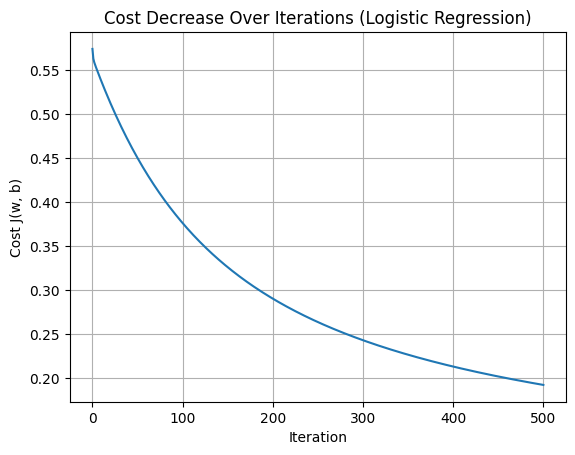

In [7]:

iterations = np.arange(len(cost_history))

plt.figure()
plt.plot(iterations, cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w, b)")
plt.title("Cost Decrease Over Iterations (Logistic Regression)")
plt.grid(True)
plt.show()



## 8. Visualizing Predictions

Now we plot:

- The original data points  
- The predicted probability curve  


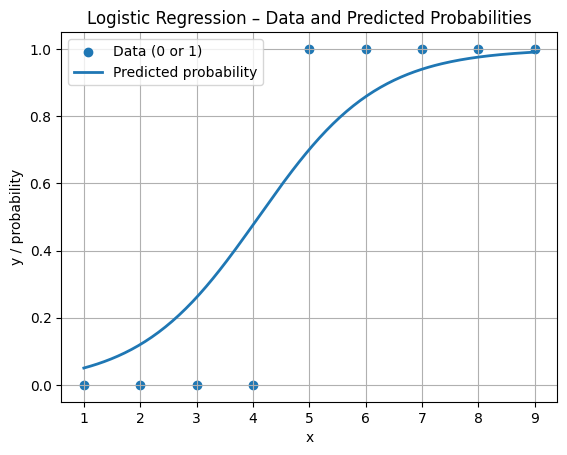

In [8]:

x_dense = np.linspace(min(x), max(x), 200)
y_prob = predict_prob(x_dense, w_final, b_final)

plt.figure()
plt.scatter(x, y, label="Data (0 or 1)")
plt.plot(x_dense, y_prob, label="Predicted probability", linewidth=2)
plt.xlabel("x")
plt.ylabel("y / probability")
plt.title("Logistic Regression – Data and Predicted Probabilities")
plt.grid(True)
plt.legend()
plt.show()



## 9. Decision Boundary

The **decision boundary** is the value of x where the model predicts probability 0.5:

\[ \hat{y} = 0.5 \Rightarrow wx + b = 0 \Rightarrow x = -\frac{b}{w} \]

Values of x below this boundary are classified as 0, above as 1.


Decision boundary (x where probability = 0.5): 4.1018646087559105


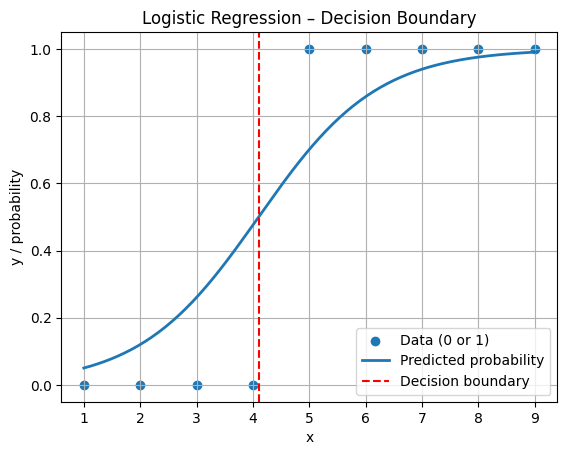

In [9]:

if w_final != 0:
    decision_boundary = -b_final / w_final
    print("Decision boundary (x where probability = 0.5):", decision_boundary)
else:
    decision_boundary = None
    print("Decision boundary undefined because w_final = 0")

plt.figure()
plt.scatter(x, y, label="Data (0 or 1)")
plt.plot(x_dense, y_prob, label="Predicted probability", linewidth=2)
if decision_boundary is not None:
    plt.axvline(decision_boundary, color="red", linestyle="--", label="Decision boundary")
plt.xlabel("x")
plt.ylabel("y / probability")
plt.title("Logistic Regression – Decision Boundary")
plt.grid(True)
plt.legend()
plt.show()



## ✅ Summary

In this notebook, you:

- Built a simple binary classification dataset  
- Defined and used the sigmoid function  
- Implemented logistic regression: \( \hat{y} = \sigma(wx + b) \)  
- Implemented the binary cross-entropy cost function  
- Computed gradients of the cost  
- Trained the model with gradient descent  
- Visualized cost decrease and predicted probabilities  
- Found the decision boundary \( x = -b / w \)  


